In [2]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Leitura

In [3]:
evolucao_selic = pd.read_csv(r"bases/q3/evolucao_selic.csv", sep=";")
titulos_emitidos_governo = pd.read_csv(r"bases/q3/titulos_emitidos_governo.csv", sep=";")
titulos_detidos_bacen = pd.read_csv(r"bases/q3/titulos_detidos_bacen.csv", sep=";")

In [4]:
evolucao_selic.dtypes

data      object
valor    float64
dtype: object

In [5]:
evolucao_selic.head()

,data,valor
0,17/01/2018,6.9
1,18/01/2018,6.9
2,19/01/2018,6.9
3,22/01/2018,6.9
4,23/01/2018,6.9


In [6]:
titulos_emitidos_governo.dtypes

data     object
valor     int64
dtype: object

In [7]:
titulos_emitidos_governo.head()

,data,valor
0,1 Trim.2018,5316871
1,2 Trim.2018,5483583
2,3 Trim.2018,5524099
3,4 Trim.2018,5636804
4,1 Trim.2019,5705391


In [8]:
titulos_detidos_bacen.dtypes

data     object
valor     int64
dtype: object

In [9]:
titulos_detidos_bacen.head()

,data,valor
0,1 Trim.2021,2093818
1,2 Trim.2021,2115298
2,3 Trim.2021,2019647
3,4 Trim.2021,2037702
4,1 Trim.2022,2042311


# 1.1 Ajuste das Tabelas

In [10]:
evolucao_selic

,data,valor
0,17/01/2018,6.90
1,18/01/2018,6.90
2,19/01/2018,6.90
3,22/01/2018,6.90
4,23/01/2018,6.90
...,...,...
1792,10/03/2025,13.15
1793,11/03/2025,13.15
1794,12/03/2025,13.15
1795,13/03/2025,13.15


In [11]:
evolucao_selic['data'] = pd.to_datetime(evolucao_selic['data'], format='%d/%m/%Y')
evolucao_selic.head()

,data,valor
0,2018-01-17,6.9
1,2018-01-18,6.9
2,2018-01-19,6.9
3,2018-01-22,6.9
4,2018-01-23,6.9


In [12]:
evolucao_selic.dtypes

data     datetime64[ns]
valor           float64
dtype: object

# 2. Análise de Nulos

In [13]:
evolucao_selic.isna().sum() / len(evolucao_selic)

data     0.0
valor    0.0
dtype: float64

In [14]:
titulos_emitidos_governo.isna().sum() / len(titulos_emitidos_governo)

data     0.0
valor    0.0
dtype: float64

In [15]:
titulos_detidos_bacen.isna().sum() / len(titulos_detidos_bacen)

data     0.0
valor    0.0
dtype: float64

# 3. Análise

## 3.1 Selic ao Longo do Tempo

In [16]:
evolucao_selic = evolucao_selic[evolucao_selic['data'] >= '2022-06-01']

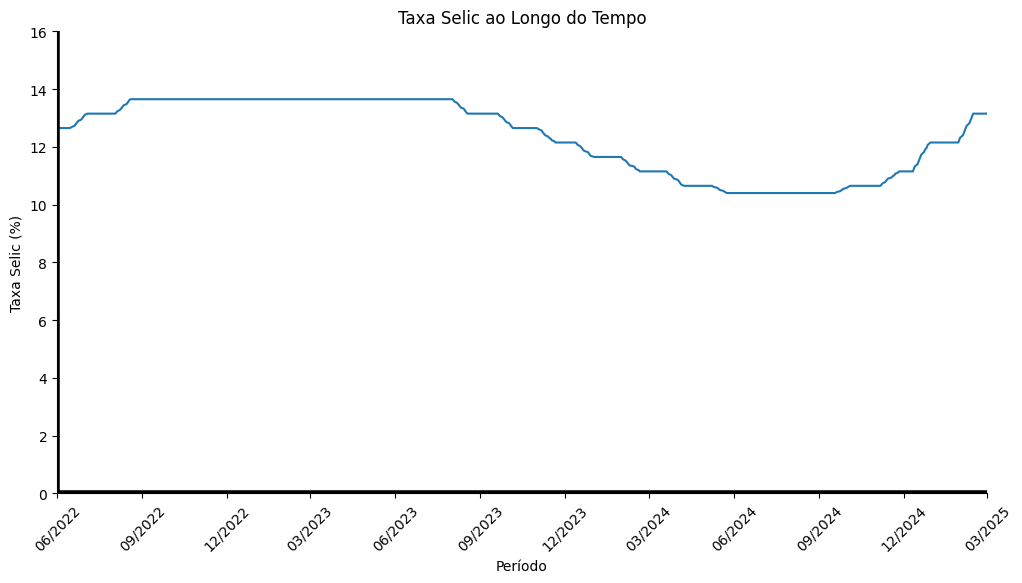

In [17]:
plt.figure(figsize=(12,6))

sns.lineplot(x="data", y="valor", data=evolucao_selic)

plt.title('Taxa Selic ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Taxa Selic (%)')

plt.ylim(0, 16)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=4)
plt.axvline(x=pd.Timestamp('2022-06-01'), color='black', linewidth=4)

plt.xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2025-03-01'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)

# 3.2 Título Emitidos

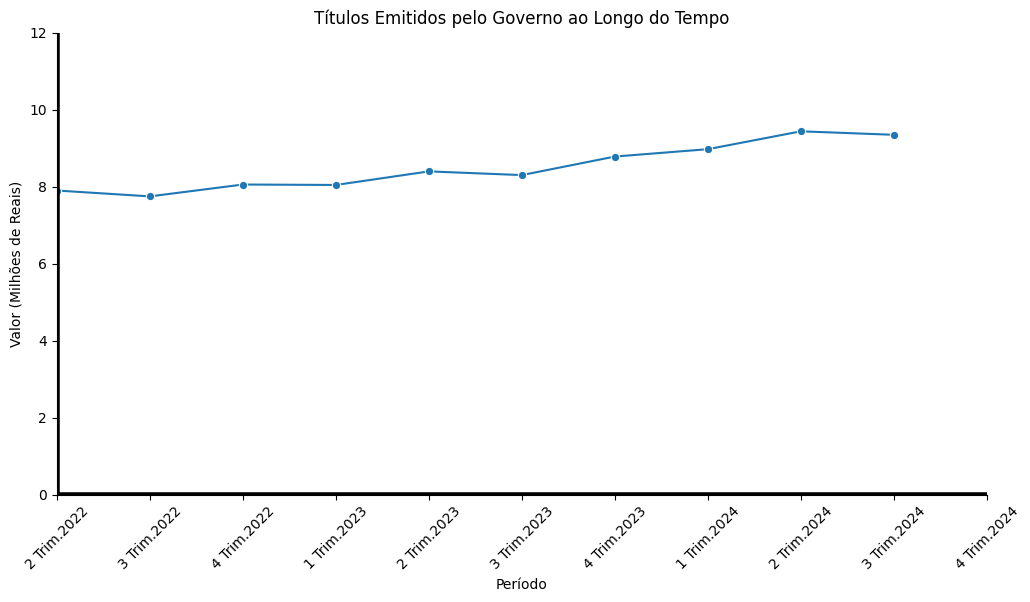

In [18]:
titulos_emitidos_governo["valor"] = titulos_emitidos_governo["valor"] / (10**6)
titulos_emitidos_governo = titulos_emitidos_governo.iloc[17:]

plt.figure(figsize=(12,6))

sns.lineplot(x="data", y="valor", data=titulos_emitidos_governo, marker="o")

plt.title('Títulos Emitidos pelo Governo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Valor (Milhões de Reais)')

plt.ylim(0, 12)
plt.xlim("2 Trim.2022", "4 Trim.2024")

plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linewidth=4)
plt.axvline(x="2 Trim.2022",color='black', linewidth=4)


plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)


# 3.3 Títulos Detidos

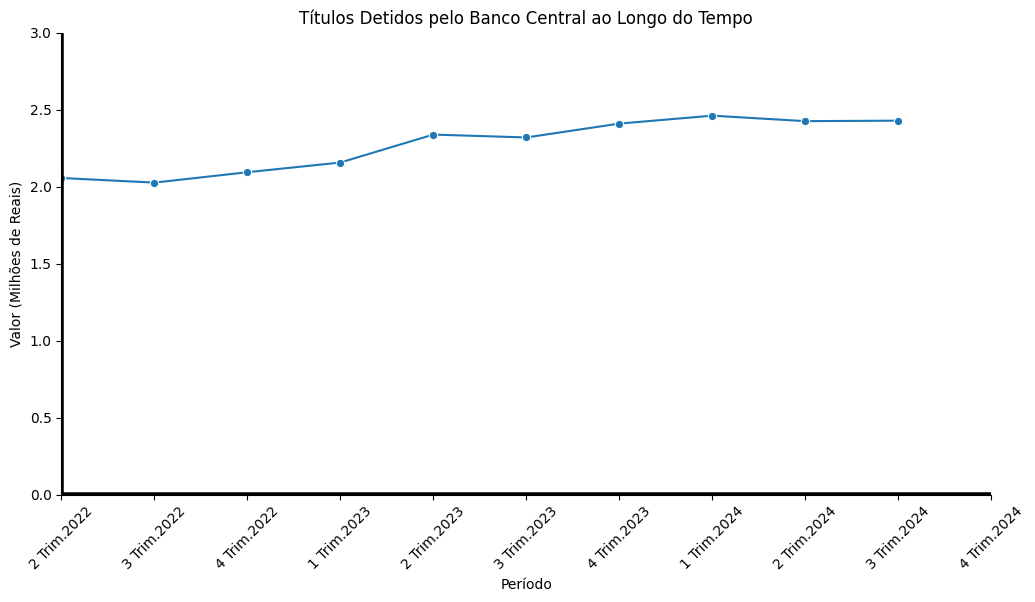

In [19]:
titulos_detidos_bacen["valor"] = titulos_detidos_bacen["valor"] / (10**6)
titulos_detidos_bacen = titulos_detidos_bacen.iloc[5:]

plt.figure(figsize=(12,6))

sns.lineplot(x="data", y="valor", data=titulos_detidos_bacen, marker="o")

plt.title('Títulos Detidos pelo Banco Central ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Valor (Milhões de Reais)')

plt.ylim(0, 3)
plt.xlim("2 Trim.2022", "4 Trim.2024")

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linewidth=4)
plt.axvline(x="2 Trim.2022",color='black', linewidth=4)


plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)

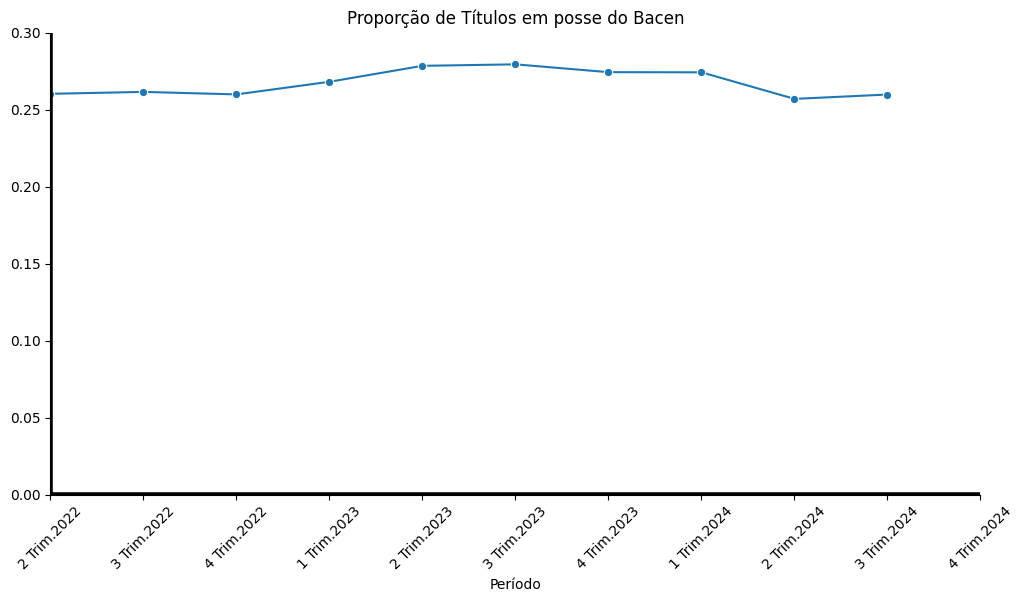

In [23]:
titulos_emitidos_governo["titulos_emitidos_governo"] = titulos_emitidos_governo["valor"]
titulos_detidos_bacen["titulos_detidos_bacen"] = titulos_detidos_bacen["valor"]

percentual = titulos_emitidos_governo.merge(titulos_detidos_bacen, on="data", how="inner")
percentual.drop(columns=["valor_x", "valor_y"], inplace=True)

percentual["percentual"] = percentual["titulos_detidos_bacen"] / percentual["titulos_emitidos_governo"]

plt.figure(figsize=(12,6))

sns.lineplot(x="data", y="percentual", data=percentual, marker="o")

plt.title('Proporção de Títulos em posse do Bacen')
plt.xlabel('Período')
plt.ylabel('')

plt.ylim(0, .3)
plt.xlim("2 Trim.2022", "4 Trim.2024")

plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linewidth=4)
plt.axvline(x="2 Trim.2022",color='black', linewidth=4)


plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

plt.grid(False)


In [21]:
percentual["delta"] = percentual["percentual"].pct_change()

In [22]:
percentual

,data,titulos_emitidos_governo,titulos_detidos_bacen,percentual,delta
0,2 Trim.2022,7.899862,2.056274,0.260292,NaN
1,3 Trim.2022,7.747531,2.026282,0.261539,0.004789
2,4 Trim.2022,8.055479,2.093673,0.259907,-0.006241
3,1 Trim.2023,8.044289,2.156737,0.268108,0.031554
4,2 Trim.2023,8.396643,2.338169,0.278465,0.038630
5,3 Trim.2023,8.300576,2.319429,0.279430,0.003466
6,4 Trim.2023,8.782488,2.409489,0.274352,-0.018174
7,1 Trim.2024,8.973783,2.461006,0.274244,-0.000392
8,2 Trim.2024,9.437724,2.425437,0.256994,-0.062901
9,3 Trim.2024,9.346931,2.428600,0.259829,0.011030
